In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D , Conv2D,Flatten
from tensorflow.keras.models import Sequential

# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.metrics import classification_report

# from IPython.display import clear_output
# import warnings
# warnings.filterwarnings('ignore')

In [69]:
dir="train_data"

data=pd.read_csv("train_labels.csv")

SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64

In [33]:
n=len(os.listdir(dir))
print("Number of images in test and train set : ",n)

Number of images in test and train set :  8000


Number of cats vs dogs images :  4000  :  4000


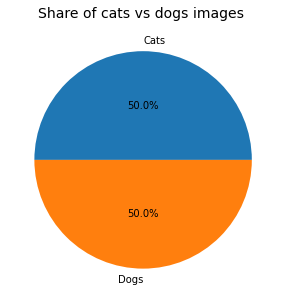

In [34]:
cats=dogs=0
for i in data["label"]:
    if i=="cat":
        cats+=1
    elif i=="dog":
        dogs+=1

plt.figure(figsize=(5, 5))
plt.pie(x=np.array([cats,dogs]), autopct="%.1f%%", labels=["Cats", "Dogs"], pctdistance=0.5)
plt.title("Share of cats vs dogs images ", fontsize=14)
print("Number of cats vs dogs images : ",cats," : ",dogs)


In [35]:
IMG_WIDTH=64
IMG_HEIGHT=64

IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH)
seed=69

INPUT_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)

In [36]:
#make input data into desired format


# cats_files=[]
# dogs_files=[]

# for i,label in enumerate(data["label"]):
#     if label=="cat":
#         cats_files.append(str(data["id"][i])+".png")
#     elif label=="dog":
#         dogs_files.append(str(data["id"][i])+".png")

# for f in cats_files:
#     shutil.copyfile(os.path.join(dir,f),os.path.join("train/cats",f))

# for f in dogs_files:
#     shutil.copyfile(os.path.join(dir,f),os.path.join("train/dogs",f))
    



In [37]:
train_set=image_dataset_from_directory(
    "train",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="training",
)

test_set=image_dataset_from_directory(
    "train",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="validation",
)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 8000 files belonging to 2 classes.
Using 1600 files for validation.


In [77]:
def transfer_learning():
    base_model=DenseNet121(include_top=False,input_shape=INPUT_SHAPE,weights="imagenet")
    
    thr=149
    for layers in base_model.layers[:thr]:
        layers.trainable=False
    
    for layers in base_model.layers[thr:]:
        layers.trainable=True
    
    return base_model

In [79]:
def create_model():
    model=Sequential()
    
    base_model=transfer_learning()
    model.add(base_model)
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation="relu"))
    
    model.add(Dense(2,activation="softmax",name="classification"))
    
    model.summary()
    
    return model

In [80]:
model=create_model()

model.compile(optimizer="adam", 
                loss='binary_crossentropy',
                metrics = "accuracy")

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_24 (Dense)            (None, 256)               262400    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                     

In [81]:
EPOCHS=10

history = model.fit(x = train_set,validation_data=test_set,epochs = EPOCHS)

Epoch 1/10
100/100 [==============================] - 154s 1s/step - loss: 0.6043 - accuracy: 0.6741 - val_loss: 1.3973 - val_accuracy: 0.6819
Epoch 2/10
100/100 [==============================] - 158s 2s/step - loss: 0.4906 - accuracy: 0.7667 - val_loss: 1.1075 - val_accuracy: 0.7475
Epoch 3/10
100/100 [==============================] - 153s 2s/step - loss: 0.4127 - accuracy: 0.8128 - val_loss: 0.7117 - val_accuracy: 0.7181
Epoch 4/10
100/100 [==============================] - 146s 1s/step - loss: 0.3489 - accuracy: 0.8527 - val_loss: 0.6384 - val_accuracy: 0.7656
Epoch 5/10
100/100 [==============================] - 146s 1s/step - loss: 0.3193 - accuracy: 0.8648 - val_loss: 0.6516 - val_accuracy: 0.7800
Epoch 6/10
100/100 [==============================] - 145s 1s/step - loss: 0.2469 - accuracy: 0.8966 - val_loss: 0.6417 - val_accuracy: 0.7613
Epoch 7/10
100/100 [==============================] - 1813s 18s/step - loss: 0.1904 - accuracy: 0.9231 - val_loss: 0.5722 - val_accuracy: 0.78

77 % validation accuracy with 7,958,850 total parameters.